## Connect to OGC API - Features service

The YIPEEO vector data is exposed as [OGC API features](https://ogcapi.ogc.org/features/) accessible via [https://features.dev.services.eodc.eu/].
This tutorial demonstates the use of the OGC API - Features making use to the [owslib](https://owslib.readthedocs.io/en/latest/index.html) Python client.

In [1]:
import os
import geopandas as gpd
import contextily as cx
from owslib.ogcapi.features import Features
from rich.console import Console

console = Console()

EODC_OGCAPI_URL = 'https://features.dev.services.eodc.eu/'

eodc_ogcapi = Features(EODC_OGCAPI_URL)
collections = eodc_ogcapi.collections()
console.print(collections)

{
    'collections': [
        {
            'id': 'yipeeo_yield_fl',
            'title': 'YIPEEO Field-Level Yield Data',
            'description': 'Yield data at field level.',
            'keywords': ['Field level', 'Yield data'],
            'links': [
                {
                    'type': 'application/json',
                    'rel': 'root',
                    'title': 'The landing page of this server as JSON',
                    'href': 'https://features.dev.services.eodc.eu?f=json'
                },
                {
                    'type': 'text/html',
                    'rel': 'root',
                    'title': 'The landing page of this server as HTML',
                    'href': 'https://features.dev.services.eodc.eu?f=html'
                },
                {
                    'type': 'application/json',
                    'rel': 'self',
                    'title': 'This document as JSON',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl?f=json'
                },
                {
                    'type': 'application/ld+json',
                    'rel': 'alternate',
                    'title': 'This document as RDF (JSON-LD)',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl?f=jsonld'
                },
                {
                    'type': 'text/html',
                    'rel': 'alternate',
                    'title': 'This document as HTML',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl?f=html'
                },
                {
                    'type': 'application/schema+json',
                    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
                    'title': 'Queryables for this collection as JSON',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl/queryables?f=json'
                },
                {
                    'type': 'text/html',
                    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
                    'title': 'Queryables for this collection as HTML',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl/queryables?f=html'
                },
                {
                    'type': 'application/geo+json',
                    'rel': 'items',
                    'title': 'items as GeoJSON',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl/items?f=json'
                },
                {
                    'type': 'application/ld+json',
                    'rel': 'items',
                    'title': 'items as RDF (GeoJSON-LD)',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl/items?f=jsonld'
                },
                {
                    'type': 'text/html',
                    'rel': 'items',
                    'title': 'Items as HTML',
                    'href': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl/items?f=html'
                }
            ],
            'extent': {
                'spatial': {'bbox': [[-10, 35, 20, 58]], 'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
                'temporal': {'interval': [[None, None]]}
            },
            'itemType': 'feature',
            'crs': ['http://www.opengis.net/def/crs/OGC/1.3/CRS84'],
            'storageCRS': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'
        }
    ],
    'links': [
        {
            'type': 'application/json',
            'rel': 'self',
            'title': 'This document as JSON',
            'href': 'https://features.dev.services.eodc.eu/collections?f=json'
        },
        {
            'type': 'application/ld+json',
            'rel': 'alternate',
            'title': 'This document as RDF (JSON-LD)',
            'href': 'https://feature

Get collections names only

In [2]:
# list of feature collection names
feature_collections = eodc_ogcapi.feature_collections()
console.print(feature_collections)

['yipeeo_yield_fl']

Get all queryables provided by the given feature collection

In [3]:
queryables = eodc_ogcapi.collection_queryables('yipeeo_yield_fl')
console.print(queryables)

{
    'type': 'object',
    'title': 'YIPEEO Field-Level Yield Data',
    'properties': {
        'geometry': {'$ref': 'https://geojson.org/schema/Geometry.json'},
        'row_id': {'title': 'row_id', 'type': 'INTEGER'},
        'field_id': {'title': 'field_id', 'type': 'TEXT'},
        'data_openness': {'title': 'data_openness', 'type': 'BOOLEAN'},
        'country_code': {'title': 'country_code', 'type': 'CHAR(3)'},
        'farm_code': {'title': 'farm_code', 'type': 'CHAR(5)'},
        'c_year': {'title': 'c_year', 'type': 'SMALLINT'},
        'crop_type': {'title': 'crop_type', 'type': 'TEXT'},
        'crop_id': {'title': 'crop_id', 'type': 'CHAR(5)'},
        'sowing_date': {'title': 'sowing_date', 'type': 'DATE'},
        'harvest_date': {'title': 'harvest_date', 'type': 'DATE'},
        'yield': {'title': 'yield', 'type': 'DOUBLE_PRECISION'},
        'moisture': {'title': 'moisture', 'type': 'DOUBLE_PRECISION'},
        'management_type': {'title': 'management_type', 'type': 'TEXT'},
        'tilage': {'title': 'tilage', 'type': 'TEXT'},
        'nitrogen_dose': {'title': 'nitrogen_dose', 'type': 'DOUBLE_PRECISION'},
        'soil_type': {'title': 'soil_type', 'type': 'TEXT'},
        'crop_damage': {'title': 'crop_damage', 'type': 'TEXT'},
        'irrigation': {'title': 'irrigation', 'type': 'TEXT'}
    },
    '$schema': 'http://json-schema.org/draft/2019-09/schema',
    '$id': 'https://features.dev.services.eodc.eu/collections/yipeeo_yield_fl/queryables'
}

Print the first items in the given feature collection

In [4]:
items = eodc_ogcapi.collection_items('yipeeo_yield_fl')
console.print(items)

{
    'type': 'FeatureCollection',
    'features': [
        {
            'type': 'Feature',
            'properties': {
                'crop_id': 'C1320',
                'soil_type': 'na',
                'sowing_date': None,
                'crop_damage': 'na',
                'data_openness': False,
                'harvest_date': None,
                'irrigation': 'na',
                'yield': 1.521371166,
                'country_code': 'cz ',
                'moisture': None,
                'farm_code': 'rost ',
                'management_type': 'conventional',
                'c_year': 2017,
                'tilage': 'na',
                'field_id': 'cz_rost_606199',
                'crop_type': 'spring barley',
                'nitrogen_dose': None
            },
            'id': 1,
            'geometry': {
                'type': 'MultiPolygon',
                'coordinates': [
                    [
                        [
                            [16.957924339000044, 49.188337398000044],
                            [16.95785815200003, 49.18834926200003],
                            [16.957684791000077, 49.18837276600004],
                            [16.95748225500006, 49.18838886700007],
                            [16.95726178900003, 49.188387480000074],
                            [16.957108756000025, 49.18836083000008],
                            [16.95691666600004, 49.18831073800004],
                            [16.956709001000036, 49.18823698900008],
                            [16.95657689600006, 49.188175845000046],
                            [16.95647286700006, 49.188114787000075],
                            [16.956362186000035, 49.18824963200006],
                            [16.95639140800006, 49.18824799800007],
                            [16.956420490000028, 49.188273475000074],
                            [16.956430467000075, 49.18829765800007],
                            [16.955763884000078, 49.189180964000066],
                            [16.955787199000042, 49.18919474900009],
                            [16.95581776000006, 49.18920274700008],
                            [16.95584103400006, 49.189200982000045],
                            [16.955861396000046, 49.189192785000046],
                            [16.955875872000036, 49.18917941400008],
                            [16.955896377000045, 49.18914932100006],
                            [16.955906826000046, 49.189135004000036],
                            [16.955918180000026, 49.18912116100006],
                            [16.95593307300004, 49.18911311900006],
                            [16.955950813000072, 49.18911084600006],
                            [16.95596967000006, 49.189113888000065],
                            [16.955985527000053, 49.189122041000076],
                            [16.95600618700007, 49.18913348800004],
                            [16.956077226000048, 49.189169812000046],
                            [16.956147163000026, 49.189205016000074],
                            [16.956205237000063, 49.18923721100004],
                            [16.956272394000052, 49.18927156400008],
                            [16.956353560000025, 49.18931478500007],
                            [16.95643108400003, 49.189358922000054],
                            [16.956546923000076, 49.18942489800003],
                            [16.95666420300006, 49.18948844400007],
                            [16.95674316000003, 49.18953114100004],
                            [16.956823992000068, 49.189572990000045],
                            [16.95690574100007, 49.18961580600006],
                            [16.956986632000053, 49.18965738000003],
                            [16.957062026000074, 49.18969610800008],
                            [16.95717700600005, 49.18975497100007],
                            [16.95725906100006, 49.189797706000036],
                            [16.95733986700003, 49.18983950600005],
         

## Run a query to extract certain features
Query collection **yipeeo_yield_fl** for
 - common winter wheat (C1111)
 - winter barley (C1310), and 
 - for a given bounding box near Brno
 
 and we only want to have a subset of all attributes (properties)
 

In [5]:
bbox = [16.229703926693578,48.713318232352485,17.472665146572798,49.4680057323523]

selected_props="crop_type,crop_id,sowing_date,yield,c_year"

cql_filter = "crop_type='common winter wheat' OR crop_type='winter barley'"

# get all items in the yipeeo_yield_fl collection
field_items = eodc_ogcapi.collection_items(
    "yipeeo_yield_fl",
    bbox = bbox,
    limit = 2000,
    properties=selected_props,
    filter= cql_filter,
)
console.print(f"We found {len(field_items['features'])} items matching the query criteria.")

We found 273 items matching the query criteria.

## Convert features into Geopandas DataFrame

In [6]:
df = gpd.GeoDataFrame.from_features(field_items["features"], crs="EPSG:4326")
df 

,geometry,crop_id,sowing_date,yield,c_year,crop_type
0,"MULTIPOLYGON (((16.82748 49.12532, 16.82753 49...",C1111,None,4.275970,2017,common winter wheat
1,"MULTIPOLYGON (((16.87314 49.16505, 16.87198 49...",C1111,None,4.699909,2017,common winter wheat
2,"MULTIPOLYGON (((16.86716 49.07313, 16.86729 49...",C1111,None,4.757528,2017,common winter wheat
3,"MULTIPOLYGON (((16.85041 49.07068, 16.85019 49...",C1310,None,5.296122,2017,winter barley
4,"MULTIPOLYGON (((16.85288 49.07222, 16.85278 49...",C1310,None,5.142093,2017,winter barley
...,...,...,...,...,...,...
268,"MULTIPOLYGON (((16.85604 49.14146, 16.85591 49...",C1111,None,8.075734,2022,common winter wheat
269,"MULTIPOLYGON (((16.89134 49.09494, 16.89126 49...",C1310,None,5.919689,2022,winter barley
270,"MULTIPOLYGON (((16.84557 49.12242, 16.84552 49...",C1111,None,8.057501,2022,common winter wheat
271,"MULTIPOLYGON (((16.88206 49.10167, 16.88210 49...",C1310,None,6.869212,2022,winter barley


## Plot geometries

In [8]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<insert 

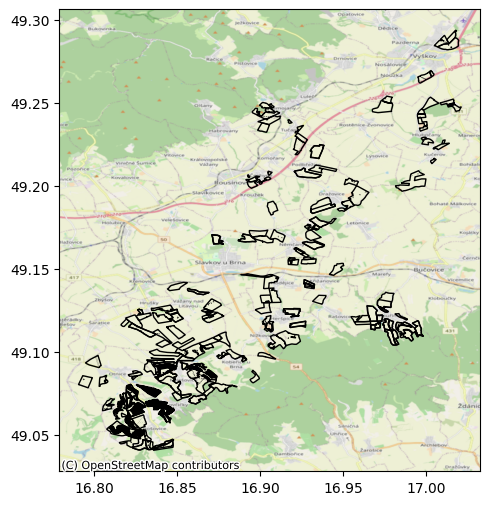

In [12]:
ax = df[["geometry"]].plot(
    facecolor="none", figsize=(12, 6)
)
cx.add_basemap(ax, crs=df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik);